# 4 Generate and rotate triangle and hexagon grids

In this example, we will introduce more options for `TransBigData` grid processing, including:
- Adding rotation angle.
- Triangle and hexagon grids.

## Rotate the grids

In [1]:
#Read taxi gps data
import transbigdata as tbd
import pandas as pd
data = pd.read_csv('data/TaxiData-Sample.csv',header = None) 
data.columns = ['VehicleNum','time','lon','lat','OpenStatus','Speed'] 
#Define the study area
bounds = [113.75, 22.4, 114.62, 22.86]
#Delete the data out of the study area
data = tbd.clean_outofbounds(data,bounds = bounds,col = ['lon','lat'])

The grid coordinates system offer by `TransBigData` also support adding rotation angle for the grids.  
you can also specify a rotation angle for the grids by adding the `theta` into gridding params:

In [2]:
#Obtain the gridding parameters
params = tbd.area_to_params(bounds,accuracy = 1000)
#Add a rotation angle
params['theta'] = 5
print(params)

{'slon': 113.75, 'slat': 22.4, 'deltalon': 0.00974336289289822, 'deltalat': 0.008993210412845813, 'theta': 5, 'method': 'rect', 'gridsize': 1000}


<AxesSubplot:>

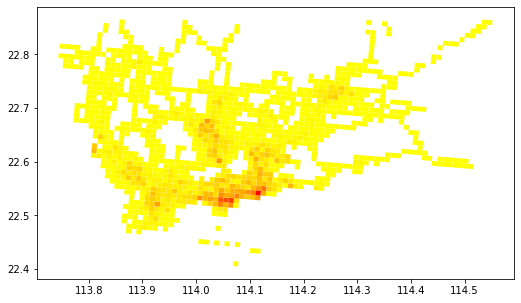

In [3]:
#Map the GPS data to grids
data['LONCOL'],data['LATCOL'] = tbd.GPS_to_grid(data['lon'],data['lat'],params)
#Aggregate data into grids
grid_agg = data.groupby(['LONCOL','LATCOL'])['VehicleNum'].count().reset_index()
#Generate grid geometry
grid_agg['geometry'] = tbd.grid_to_polygon([grid_agg['LONCOL'],grid_agg['LATCOL']],params)
#Change the type into GeoDataFrame
import geopandas as gpd
grid_agg = gpd.GeoDataFrame(grid_agg)
#Plot the grids
grid_agg.plot(column = 'VehicleNum',cmap = 'autumn_r',figsize=(10,5))

## Triangle and Hexagon grids

In [4]:
#Triangle grids
params['method'] = 'tri'

<AxesSubplot:>

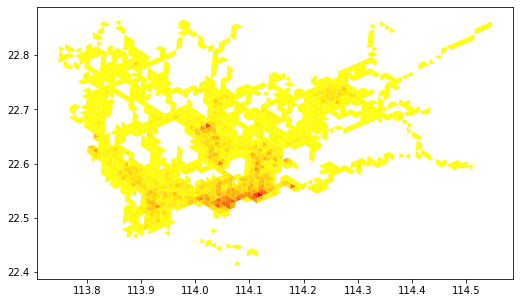

In [5]:
#Map the GPS data to grids
data['loncol_1'],data['loncol_2'],data['loncol_3'] = tbd.GPS_to_grid(data['lon'],data['lat'],params)
#Aggregate data into grids
grid_agg = data.groupby(['loncol_1','loncol_2','loncol_3'])['VehicleNum'].count().reset_index()
#Generate grid geometry
grid_agg['geometry'] = tbd.grid_to_polygon([grid_agg['loncol_1'],grid_agg['loncol_2'],grid_agg['loncol_3']],params)
#Change the type into GeoDataFrame
import geopandas as gpd
grid_agg = gpd.GeoDataFrame(grid_agg)
#Plot the grids
grid_agg.plot(column = 'VehicleNum',cmap = 'autumn_r',figsize=(10,5))

In [6]:
#Hexagon grids
params['method'] = 'hexa'

<AxesSubplot:>

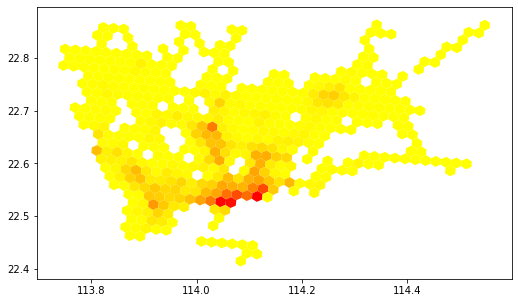

In [7]:
#Map the GPS data to grids
data['loncol_1'],data['loncol_2'],data['loncol_3'] = tbd.GPS_to_grid(data['lon'],data['lat'],params)
#Aggregate data into grids
grid_agg = data.groupby(['loncol_1','loncol_2','loncol_3'])['VehicleNum'].count().reset_index()
#Generate grid geometry
grid_agg['geometry'] = tbd.grid_to_polygon([grid_agg['loncol_1'],grid_agg['loncol_2'],grid_agg['loncol_3']],params)
#Change the type into GeoDataFrame
import geopandas as gpd
grid_agg = gpd.GeoDataFrame(grid_agg)
#Plot the grids
grid_agg.plot(column = 'VehicleNum',cmap = 'autumn_r',figsize=(10,5))